## Importing Libraries and Reading Data
- **Import Libraries:** You import necessary libraries: numpy for numerical computations, pandas for data manipulation, and matplotlib for plotting.
- **Read Data:** The MNIST dataset is loaded from a CSV file using pandas.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
from datetime import datetime
import pickle

In [2]:
os.getcwd()

'C:\\Users\\Rikhil Nellimarla\\PycharmProjects\\MLtraining\\notebooks'

In [3]:
data = pd.read_csv('../data/train.csv')

In [4]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data Preprocessing
- **Convert to Numpy Array:** The dataset is converted to a Numpy array for easier manipulation.
- **Shuffle Data:** The data is shuffled to ensure randomness.
- **Split Data:** The data is split into training and development sets. The development set contains 1000 samples, and the rest
are for training.
- **Normalize Data:** The pixel values are normalized by dividing by 255 (to scale values between 0 and 1).

In [5]:
data = np.array(data)
m, n = data.shape
print(m, n)
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

42000 785


## Neural Network Architecture

Our NN will have a simple two-layer architecture. Input layer $a^{[0]}$
will have 784 units corresponding to the 784 pixels in each 28x28 input image. A hidden layer $a^{[1]}$ will have 10 units with ReLU activation, and finally our output layer $a^{[2]}$ will have 10 units corresponding to the ten digit classes with softmax activation.

## Forward Propagation


\begin{align*}
Z^{[1]} &= W^{[1]}X + b^{[1]} \\
A^{[1]} &= g_{\text{ReLU}}(Z^{[1]}) \\
Z^{[2]} &= W^{[2]}A^{[1]} + b^{[2]} \\
A^{[2]} &= g_{\text{softmax}}(Z^{[2]})
\end{align*}

## Backward Propagation


\begin{align*}
dZ^{[2]} &= A^{[2]} - Y \\
dW^{[2]} &= \frac{1}{m} dZ^{[2]} (A^{[1]})^T \\
dB^{[2]} &= \frac{1}{m} \sum dZ^{[2]} \\
dZ^{[1]} &= (W^{[2]})^T dZ^{[2]} \cdot g'_{\text{ReLU}}(Z^{[1]}) \\
dW^{[1]} &= \frac{1}{m} dZ^{[1]} (A^{[0]})^T \\
dB^{[1]} &= \frac{1}{m} \sum dZ^{[1]}
\end{align*}


## Parameter Updates


\begin{align*}
W^{[2]} &:= W^{[2]} - \alpha dW^{[2]} \\
b^{[2]} &:= b^{[2]} - \alpha dB^{[2]} \\
W^{[1]} &:= W^{[1]} - \alpha dW^{[1]} \\
b^{[1]} &:= b^{[1]} - \alpha dB^{[1]}
\end{align*}


## Variables and Shapes

### Forward Propagation


\begin{align*}
A^{[0]} = X &\quad : \quad 784 \times m \\
Z^{[1]} \sim A^{[1]} &\quad : \quad 10 \times m \\
W^{[1]} &\quad : \quad 10 \times 784 \quad (\text{as } W^{[1]} A^{[0]} \sim Z^{[1]}) \\
b^{[1]} &\quad : \quad 10 \times 1 \\
Z^{[2]} \sim A^{[2]} &\quad : \quad 10 \times m \\
W^{[2]} &\quad : \quad 10 \times 10 \quad (\text{as } W^{[2]} A^{[1]} \sim Z^{[2]}) \\
b^{[2]} &\quad : \quad 10 \times 1
\end{align*}


### Backward Propagation


\begin{align*}
dZ^{[2]} &\quad : \quad 10 \times m \quad (A^{[2]}) \\
dW^{[2]} &\quad : \quad 10 \times 10 \\
dB^{[2]} &\quad : \quad 10 \times 1 \\
dZ^{[1]} &\quad : \quad 10 \times m \quad (A^{[1]}) \\
dW^{[1]} &\quad : \quad 10 \times 10 \\
dB^{[1]} &\quad : \quad 10 \times 1
\end{align*}



In [6]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [7]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def compute_loss(A2, Y):
    m = Y.shape[0]
    log_likelihood = -np.log(A2[Y, range(m)])
    loss = np.sum(log_likelihood) / m
    return loss

def name_setter(path, name, filetype):
    now = datetime.now()
    timestamp = now.strftime("%Y-%m-%d_%H-%M-%S")
    filename = f"{name}({path}_{timestamp}).{filetype}"
    save_path = os.path.join("..",path, filename)
    return save_path

def save_plots(accuracy_list, loss_list):

    iterations = range(len(accuracy_list))

    plt.figure(figsize=(12, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(iterations, accuracy_list, label='Accuracy')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Iterations')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(iterations, loss_list, label='Loss')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Loss over Iterations')
    plt.legend()

    plt.tight_layout()
    name = input("Name of the results: ")
    plt.savefig(name_setter("results",name,"png"))
    plt.show()

# Function to save model parameters
def save_model(W1, b1, W2, b2):
    name = input("Name of the model: ")
    save_path = name_setter("models",name,"pk1")
    with open(save_path, 'wb') as file:
        pickle.dump((W1, b1, W2, b2), file)
    print(f"Model saved as {save_path}.")

def list_models():
    model_files = os.listdir("..\\models")
    print(model_files)
    model_names = [file.split('(')[0] for file in model_files]

    print("Available models:")
    for i, name in enumerate(model_names, start=1):
        print(f"{i}. {name}")


def load_model(custom_name):
    model_files = os.listdir("..\\models")

    for file in model_files:
        if custom_name in file:
            model_path = os.path.join("..\\models", file)

            with open(model_path, 'rb') as f:
                W1, b1, W2, b2 = pickle.load(f)

            print(f"Model loaded from {file}.")
            return W1, b1, W2, b2

    print(f"No model found with custom name '{custom_name}'.")
    
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    accuracy_list = []
    loss_list = []

    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        if i % 10 == 0:
            predictions = get_predictions(A2)
            accuracy = get_accuracy(predictions, Y)
            loss = np.mean(np.sum(-np.log(A2 + 1e-8) * one_hot(Y), axis=0))  # Compute cross-entropy loss
            accuracy_list.append(accuracy)
            loss_list.append(loss)
            print(f"Iteration: {i} - Accuracy: {accuracy} - Loss: {loss}")

    save_plots(accuracy_list, loss_list)
    
    save_model_input = input("Do you wish to save this model? (yes/no)")
    if save_model_input == "yes":
        save_model(W1, b1, W2, b2)
        
    return W1, b1, W2, b2


[0 2 9 ... 0 9 2] [1 2 7 ... 0 8 5]
Iteration: 0 - Accuracy: 0.09678048780487805 - Loss: 3.1647377867847157
[0 3 8 ... 0 9 7] [1 2 7 ... 0 8 5]
Iteration: 10 - Accuracy: 0.16058536585365854 - Loss: 2.2780462738657916
[0 2 8 ... 0 9 7] [1 2 7 ... 0 8 5]
Iteration: 20 - Accuracy: 0.23202439024390245 - Loss: 2.09535669046943
[0 2 7 ... 0 6 7] [1 2 7 ... 0 8 5]
Iteration: 30 - Accuracy: 0.3123170731707317 - Loss: 1.945915255172073
[0 2 7 ... 0 7 7] [1 2 7 ... 0 8 5]
Iteration: 40 - Accuracy: 0.39782926829268295 - Loss: 1.7943891592278385
[1 2 7 ... 0 8 7] [1 2 7 ... 0 8 5]
Iteration: 50 - Accuracy: 0.46851219512195125 - Loss: 1.6395564652834778
[1 2 7 ... 0 8 7] [1 2 7 ... 0 8 5]
Iteration: 60 - Accuracy: 0.5170975609756098 - Loss: 1.488700154920621
[1 2 7 ... 0 8 7] [1 2 7 ... 0 8 5]
Iteration: 70 - Accuracy: 0.5590243902439025 - Loss: 1.3543603786809573
[1 2 7 ... 0 8 7] [1 2 7 ... 0 8 5]
Iteration: 80 - Accuracy: 0.5909268292682927 - Loss: 1.2439031773331308
[1 2 7 ... 0 8 7] [1 2 7 ...

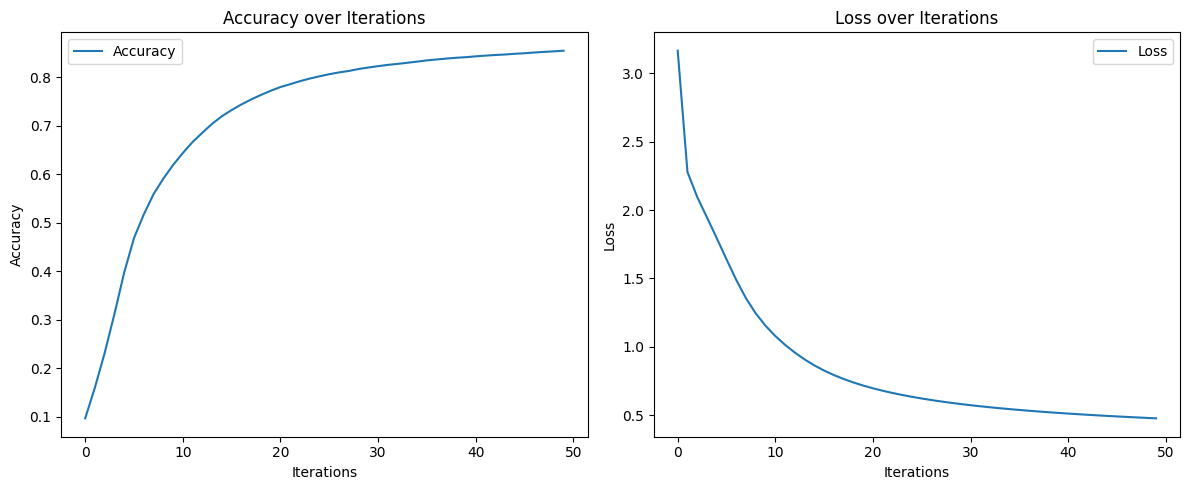

In [8]:
use_saved_model = input("Do you want to test with the current model or a saved model? (current/saved): ").lower()
if use_saved_model == 'saved':
    list_models()
    name = input("Enter the name of the model: ")
    W1, b1, W2, b2 = load_model(name)
else:
    W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)
    

In [9]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_dev[:, index, None]
    prediction = make_predictions(X_dev[:, index, None], W1, b1, W2, b2)
    label = Y_dev[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [8]
Label:  4


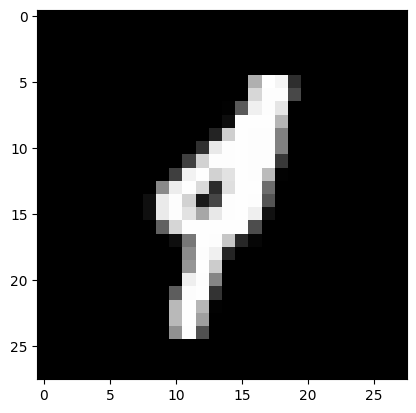

In [12]:
test_prediction(122, W1, b1, W2, b2)